## Importing Libraries

In [6]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt


In [7]:


# Raw URL
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AAPL', 'GOOGL', 'AMZN']

news_tables = {}

# Iterate over each ticker and create a URL to parse
for ticker in tickers:
    url = finviz_url + ticker

# Requesting data from this URL and creating data that allow access to this data
    req = Request(url=url, headers={'User-Agent': 'Mozilla/5.0'})
    response = urlopen(req)

# Parse the response using BeautifulSoup
    html = BeautifulSoup(response, 'html.parser')

# getting the html object of the news-table id
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table
    



if a user-agent is not specified, we won't be given access to download the data from the website

## Manipulating the Finviz Data

In [8]:

# Creating a data structure which in this case is a list
parsed_data = []

# iterating over the news_table dict

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):

# Scrapping the text in the anchor tag in the tr        
        title = row.a.get_text()
        
# scrapping the date, removing newline characters or whitespace with strip and slipting it
        date_data = row.td.text.strip().split(' ')

# Checking if the html object have only time or date or have both
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title]) 

print(parsed_data)           

[['AAPL', 'Jul-05-23', '04:49PM', 'Dow Jones Today: Index Drops on Fed Minutes'], ['AAPL', 'Jul-05-23', '01:17PM', 'Apple (AAPL) Loses Appeal With Optis Over 4G Patent Dispute'], ['AAPL', 'Jul-05-23', '12:01PM', 'Stock market today: Dow slips as Fed minutes show more hikes ahead; Meta jumps'], ['AAPL', 'Jul-05-23', '11:58AM', "It's not just tech. Other stocks are hitting 52-week highs."], ['AAPL', 'Jul-05-23', '11:23AM', "Apple Loses Appeal Over 4G Patent Infringement In London Court, AI Can Drive TSMC's Revenue Rebound, Alibaba Conducts Strategic Review of Youku and Tudou Amidst Rivalry: Today's Top Stories"], ['AAPL', 'Jul-05-23', '11:13AM', '20 Largest Economies in the World by 2050'], ['AAPL', 'Jul-05-23', '10:19AM', 'Microsoft to Join Apple in $3 Trillion Club by 2024, Analyst Says'], ['AAPL', 'Jul-05-23', '10:05AM', 'Apple Loses Appeal Over 4G Patent Infringement in London Court, Optis Scores Another Victory'], ['AAPL', 'Jul-05-23', '08:28AM', 'The Zacks Analyst Blog Highlights A

## Sentiment Analysis

In [9]:
df =pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

vader = SentimentIntensityAnalyzer()

# Creating a function to get the compound score
func = lambda x: vader.polarity_scores(x)['compound']
    
# Adding a new column to store the compund score    
df['compound'] = df['title'].apply(func)
  

print(df.head())

  ticker       date     time  \
0   AAPL  Jul-05-23  04:49PM   
1   AAPL  Jul-05-23  01:17PM   
2   AAPL  Jul-05-23  12:01PM   
3   AAPL  Jul-05-23  11:58AM   
4   AAPL  Jul-05-23  11:23AM   

                                               title  compound  
0        Dow Jones Today: Index Drops on Fed Minutes    0.0000  
1  Apple (AAPL) Loses Appeal With Optis Over 4G P...   -0.6124  
2  Stock market today: Dow slips as Fed minutes s...    0.0000  
3  It's not just tech. Other stocks are hitting 5...    0.0000  
4  Apple Loses Appeal Over 4G Patent Infringement...   -0.5574  


## Visualization

<Figure size 1000x800 with 0 Axes>

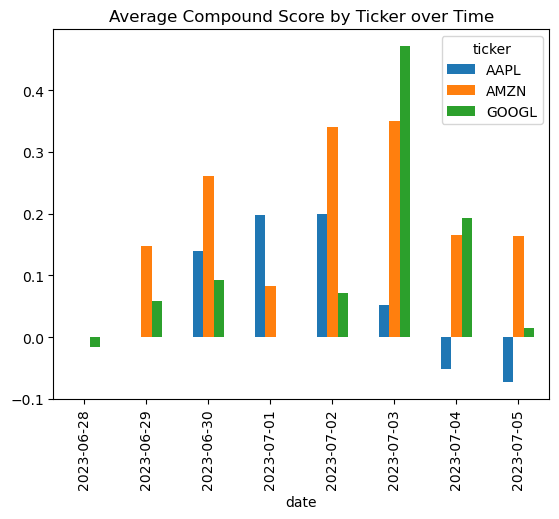

In [10]:
# convert the date column from sting to date format
df['date'] = pd.to_datetime(df.date).dt.date

# Trend over time
plt.figure(figsize=(10,8))

# checking if a day has a positive or negative on an average on each day
mean_df = df.groupby(['ticker', 'date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis='columns').transpose()


# Create the bar plot using seaborn
mean_df.plot(kind='bar')
plt.title('Average Compound Score by Ticker over Time')

plt.show()



